11501568/11490434 [==============================] - 0s 0us/step


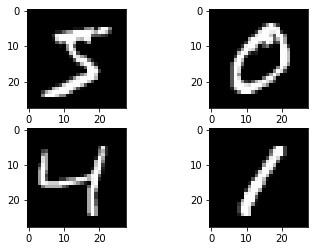

In [ ]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()
for i in range(4):
	plt.subplot(2,2,i+1)
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape( -1, 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
600/600 [==============================] - 3s 3ms/step - loss: 0.3922 - acc: 0.8929 - val_loss: 0.2111 - val_acc: 0.9390
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1862 - acc: 0.9471 - val_loss: 0.1579 - val_acc: 0.9539
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1392 - acc: 0.9601 - val_loss: 0.1268 - val_acc: 0.9612
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1112 - acc: 0.9682 - val_loss: 0.1117 - val_acc: 0.9660
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0929 - acc: 0.9732 - val_loss: 0.1014 - val_acc: 0.9684
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0799 - acc: 0.9761 - val_loss: 0.0958 - val_acc: 0.9705
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0691 - acc: 0.9798 - val_loss: 0.0924 - val_acc: 0.9724
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (100, 784)                0         
_________________________________________________________________
dense (Dense)                (100, 64)                 50240     
_________________________________________________________________
dense_1 (Dense)              (100, 10)                 650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0837 - acc: 0.9745


[0.08369341492652893, 0.9745000004768372]

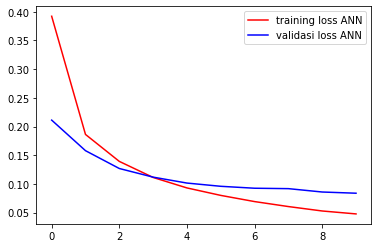

In [ ]:
import matplotlib. pyplot as plt
epochs = range(len(history1.history['loss']))
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

plt.plot(epochs, loss1, 'r' , label='training loss ANN')
plt.plot(epochs, val_loss1, 'b', label='validasi loss ANN')
plt.legend()

In [ ]:
import numpy as np
pred = model1.predict(X_test)
print('label actual: ', np.argmax(y_test[30]))
print('label prediction: ', np.argmax(pred[30]))

label actual:  3
label prediction:  3


Dropout

In [ ]:
from keras.layers import Dropout
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(10, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=100)

Epoch 1/15
600/600 [==============================] - 2s 3ms/step - loss: 0.4536 - acc: 0.8703 - val_loss: 0.2213 - val_acc: 0.9360
Epoch 2/15
600/600 [==============================] - 2s 3ms/step - loss: 0.2392 - acc: 0.9315 - val_loss: 0.1598 - val_acc: 0.9540
Epoch 3/15
600/600 [==============================] - 2s 3ms/step - loss: 0.1911 - acc: 0.9456 - val_loss: 0.1401 - val_acc: 0.9593
Epoch 4/15
600/600 [==============================] - 2s 3ms/step - loss: 0.1636 - acc: 0.9513 - val_loss: 0.1186 - val_acc: 0.9670
Epoch 5/15
600/600 [==============================] - 2s 3ms/step - loss: 0.1426 - acc: 0.9574 - val_loss: 0.1070 - val_acc: 0.9673
Epoch 6/15
600/600 [==============================] - 2s 3ms/step - loss: 0.1312 - acc: 0.9613 - val_loss: 0.1021 - val_acc: 0.9681
Epoch 7/15
600/600 [==============================] - 2s 3ms/step - loss: 0.1180 - acc: 0.9640 - val_loss: 0.0969 - val_acc: 0.9717
Epoch 8/15
600/600 [==============================] - 2s 3ms/step - loss: 0.

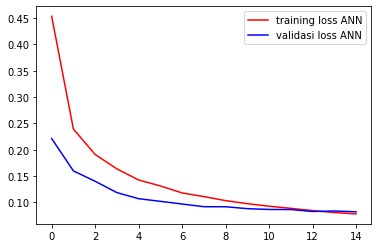

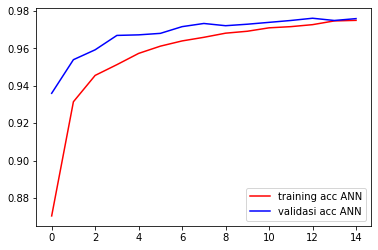

In [ ]:
epochs = range(len(history1.history['loss']))
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']

plt.plot(epochs, loss1, 'r' , label='training loss ANN')
plt.plot(epochs, val_loss1, 'b', label='validasi loss ANN')
plt.legend()
plt.figure()
plt.plot(epochs, acc1, 'r' , label='training acc ANN')
plt.plot(epochs, val_acc1, 'b', label='validasi acc ANN')
plt.legend()

Regularization L1 (lasso)

In [ ]:
from keras.regularizers import l1

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64, activation='relu', activity_regularizer=l1(0.2)))
model1.add(Dense(10, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=100)

Epoch 1/15
600/600 [==============================] - 2s 3ms/step - loss: 2.2175 - acc: 0.1800 - val_loss: 2.0242 - val_acc: 0.3103
Epoch 2/15
600/600 [==============================] - 2s 3ms/step - loss: 1.8245 - acc: 0.4142 - val_loss: 1.5982 - val_acc: 0.5225
Epoch 3/15
600/600 [==============================] - 2s 3ms/step - loss: 1.4944 - acc: 0.5357 - val_loss: 1.3690 - val_acc: 0.5929
Epoch 4/15
600/600 [==============================] - 2s 3ms/step - loss: 1.2975 - acc: 0.6338 - val_loss: 1.2517 - val_acc: 0.6506
Epoch 5/15
600/600 [==============================] - 2s 3ms/step - loss: 1.2092 - acc: 0.6755 - val_loss: 1.1725 - val_acc: 0.6985
Epoch 6/15
600/600 [==============================] - 2s 3ms/step - loss: 1.1209 - acc: 0.7291 - val_loss: 1.0799 - val_acc: 0.7543
Epoch 7/15
600/600 [==============================] - 2s 3ms/step - loss: 1.0345 - acc: 0.7671 - val_loss: 1.0125 - val_acc: 0.7837
Epoch 8/15
600/600 [==============================] - 2s 3ms/step - loss: 0.

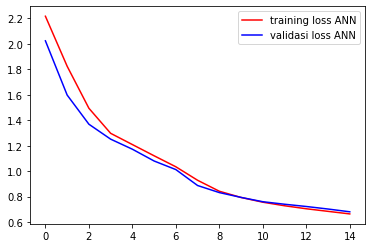

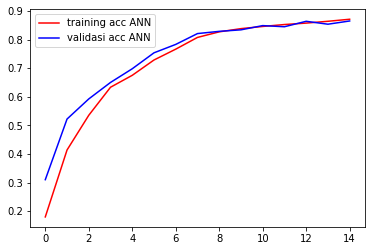

In [ ]:
epochs = range(len(history1.history['loss']))
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']

plt.plot(epochs, loss1, 'r' , label='training loss ANN')
plt.plot(epochs, val_loss1, 'b', label='validasi loss ANN')
plt.legend()
plt.figure()
plt.plot(epochs, acc1, 'r' , label='training acc ANN')
plt.plot(epochs, val_acc1, 'b', label='validasi acc ANN')
plt.legend()

Regularization L2 (ridge)

In [ ]:
from keras.regularizers import l2

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64, activation='relu', activity_regularizer=l2(0.2)))
model1.add(Dense(10, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 1.4855 - acc: 0.8099 - val_loss: 0.9578 - val_acc: 0.9208
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.7929 - acc: 0.9293 - val_loss: 0.6645 - val_acc: 0.9395
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.5996 - acc: 0.9431 - val_loss: 0.5463 - val_acc: 0.9448
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4989 - acc: 0.9521 - val_loss: 0.4685 - val_acc: 0.9508
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4376 - acc: 0.9559 - val_loss: 0.4287 - val_acc: 0.9518
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3908 - acc: 0.9597 - val_loss: 0.4040 - val_acc: 0.9486
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3562 - acc: 0.9633 - val_loss: 0.3775 - val_acc: 0.9519
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.

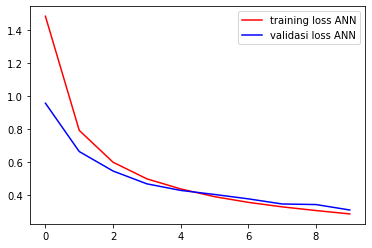

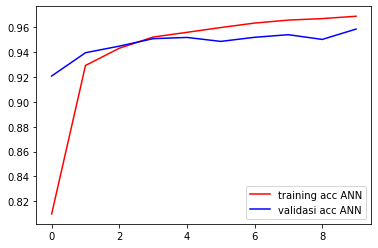

In [ ]:
epochs = range(len(history1.history['loss']))
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']

plt.plot(epochs, loss1, 'r' , label='training loss ANN')
plt.plot(epochs, val_loss1, 'b', label='validasi loss ANN')
plt.legend()
plt.figure()
plt.plot(epochs, acc1, 'r' , label='training acc ANN')
plt.plot(epochs, val_acc1, 'b', label='validasi acc ANN')
plt.legend()

Batch Normalization

In [ ]:
from keras.layers import BatchNormalization

model1 = Sequential()
model1.add(Flatten())
model1.add(BatchNormalization(axis=1))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2991 - acc: 0.9096 - val_loss: 0.1507 - val_acc: 0.9539
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1328 - acc: 0.9606 - val_loss: 0.1278 - val_acc: 0.9613
Epoch 3/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0994 - acc: 0.9697 - val_loss: 0.1124 - val_acc: 0.9680
Epoch 4/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0784 - acc: 0.9763 - val_loss: 0.1067 - val_acc: 0.9701
Epoch 5/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0640 - acc: 0.9802 - val_loss: 0.1048 - val_acc: 0.9723
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0528 - acc: 0.9830 - val_loss: 0.1011 - val_acc: 0.9730
Epoch 7/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0451 - acc: 0.9858 - val_loss: 0.1018 - val_acc: 0.9728
Epoch 8/10
600/600 [==============================] - 3s 5ms/step - loss: 0.

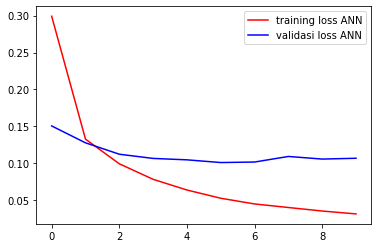

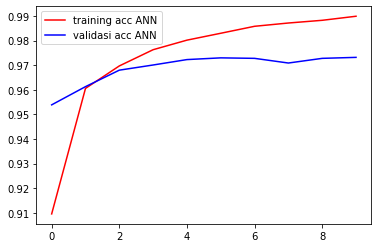

In [ ]:
epochs = range(len(history1.history['loss']))
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']

plt.plot(epochs, loss1, 'r' , label='training loss ANN')
plt.plot(epochs, val_loss1, 'b', label='validasi loss ANN')
plt.legend()
plt.figure()
plt.plot(epochs, acc1, 'r' , label='training acc ANN')
plt.plot(epochs, val_acc1, 'b', label='validasi acc ANN')
plt.legend()

Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=2)
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=100, callbacks=[es_callback])

Epoch 1/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4023 - acc: 0.8902 - val_loss: 0.2181 - val_acc: 0.9385
Epoch 2/100
600/600 [==============================] - 1s 2ms/step - loss: 0.1896 - acc: 0.9462 - val_loss: 0.1639 - val_acc: 0.9515
Epoch 3/100
600/600 [==============================] - 1s 2ms/step - loss: 0.1437 - acc: 0.9592 - val_loss: 0.1353 - val_acc: 0.9602
Epoch 4/100
600/600 [==============================] - 1s 2ms/step - loss: 0.1154 - acc: 0.9677 - val_loss: 0.1189 - val_acc: 0.9646
Epoch 5/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0970 - acc: 0.9729 - val_loss: 0.1089 - val_acc: 0.9674
Epoch 6/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0837 - acc: 0.9759 - val_loss: 0.1032 - val_acc: 0.9677
Epoch 7/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0736 - acc: 0.9790 - val_loss: 0.0918 - val_acc: 0.9715
Epoch 8/100
600/600 [==============================] - 1s 2ms/step - 

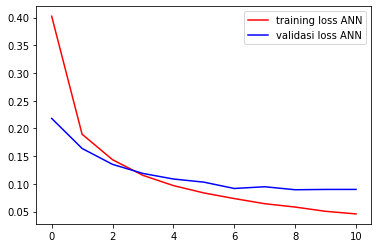

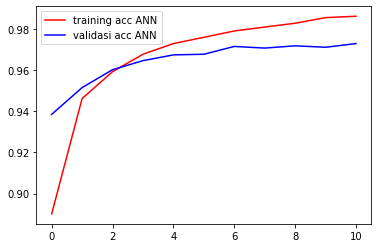

In [ ]:
epochs = range(len(history1.history['loss']))
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']

plt.plot(epochs, loss1, 'r' , label='training loss ANN')
plt.plot(epochs, val_loss1, 'b', label='validasi loss ANN')
plt.legend()
plt.figure()
plt.plot(epochs, acc1, 'r' , label='training acc ANN')
plt.plot(epochs, val_acc1, 'b', label='validasi acc ANN')
plt.legend()

Adaptive Optimizer

In [ ]:
from tensorflow import keras

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))
opt = keras.optimizers.Nadam()
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.3995 - acc: 0.8912 - val_loss: 0.2201 - val_acc: 0.9352
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1933 - acc: 0.9452 - val_loss: 0.1586 - val_acc: 0.9535
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1433 - acc: 0.9593 - val_loss: 0.1307 - val_acc: 0.9615
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1136 - acc: 0.9668 - val_loss: 0.1147 - val_acc: 0.9654
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0956 - acc: 0.9720 - val_loss: 0.1013 - val_acc: 0.9695
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0810 - acc: 0.9764 - val_loss: 0.0913 - val_acc: 0.9738
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0703 - acc: 0.9799 - val_loss: 0.0878 - val_acc: 0.9725
Epoch 8/10
600/600 [==============================] - 2s 4ms/step - loss: 0.

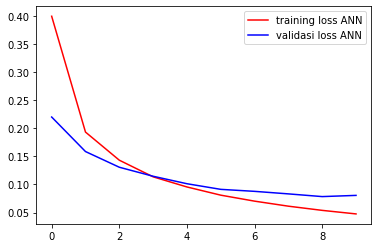

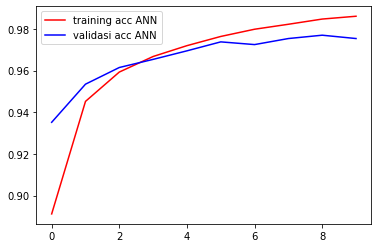

In [ ]:
epochs = range(len(history1.history['loss']))
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']

plt.plot(epochs, loss1, 'r' , label='training loss ANN')
plt.plot(epochs, val_loss1, 'b', label='validasi loss ANN')
plt.legend()
plt.figure()
plt.plot(epochs, acc1, 'r' , label='training acc ANN')
plt.plot(epochs, val_acc1, 'b', label='validasi acc ANN')
plt.legend()

Gabungan

In [ ]:
from keras.regularizers import l1_l2
from keras.layers import BatchNormalization

model1 = Sequential()
model1.add(Flatten())
model1.add(BatchNormalization())
model1.add(Dense(64, activation='relu', activity_regularizer=l1_l2(l1=0.02, l2=0.02)))
model1.add(Dropout(0.2))
model1.add(Dense(10, activation='softmax'))
opt = keras.optimizers.Nadam()
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=2)
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=100, callbacks=[es_callback])

Epoch 1/100
600/600 [==============================] - 4s 6ms/step - loss: 1.0897 - acc: 0.8709 - val_loss: 0.6797 - val_acc: 0.9347
Epoch 2/100
600/600 [==============================] - 3s 5ms/step - loss: 0.6599 - acc: 0.9273 - val_loss: 0.5359 - val_acc: 0.9470
Epoch 3/100
600/600 [==============================] - 3s 5ms/step - loss: 0.5427 - acc: 0.9391 - val_loss: 0.4569 - val_acc: 0.9519
Epoch 4/100
600/600 [==============================] - 3s 5ms/step - loss: 0.4776 - acc: 0.9438 - val_loss: 0.4125 - val_acc: 0.9577
Epoch 5/100
600/600 [==============================] - 3s 5ms/step - loss: 0.4329 - acc: 0.9469 - val_loss: 0.3734 - val_acc: 0.9598
Epoch 6/100
600/600 [==============================] - 3s 5ms/step - loss: 0.3981 - acc: 0.9502 - val_loss: 0.3550 - val_acc: 0.9593
Epoch 7/100
600/600 [==============================] - 3s 5ms/step - loss: 0.3739 - acc: 0.9514 - val_loss: 0.3388 - val_acc: 0.9602
Epoch 8/100
600/600 [==============================] - 3s 5ms/step - 

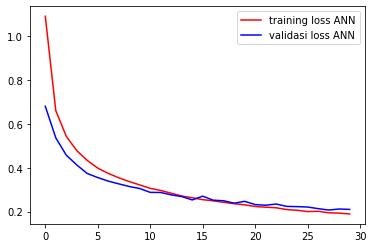

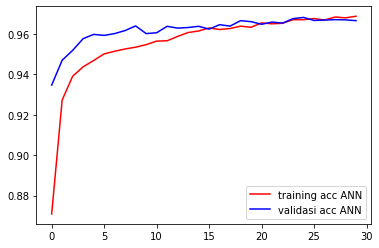

In [ ]:
epochs = range(len(history1.history['loss']))
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']

plt.plot(epochs, loss1, 'r' , label='training loss ANN')
plt.plot(epochs, val_loss1, 'b', label='validasi loss ANN')
plt.legend()
plt.figure()
plt.plot(epochs, acc1, 'r' , label='training acc ANN')
plt.plot(epochs, val_acc1, 'b', label='validasi acc ANN')
plt.legend()